<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/(%EA%B1%B4%EC%9A%B0)Robust%2C%20Quantile%2C%20Other%20Regression_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

○ 회귀분석 

회귀 모델을 한 마디로 정의하면 ‘어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균’ 입니다. 통계학적인 관점에서 보면 모든 데이터는 아래와 같은 수식으로 표현할 수 있다고 가정

고전적 선형 회귀 모델은 독립 변수의 개수에 따라 아래와 같이 명칭을 구분하기도 합니다.

단순 선형 회귀 (simple linear regression): 독립 변수가 하나
다중 선형 회귀 (multiple linear regression): 독립 변수가 둘 이상
고전적 선형 회귀 모델은 형태가 단순한만큼 데이터에 대해 많은 가정을 갖고 있습니다.

● 오차항은 평균이 0이고 분산이 일정한 정규 분포를 갖는다.

● 독립변수와 종속변수는 선형 관계이다.

● 오차항은 자기 상관성이 없다.

● 데이터에 아웃라이어가 없다.

● 독립변수와 오차항은 서로 독립이다.

● 독립변수 간에서는 서로 선형적으로 독립이다.

따라서 만약 실제 데이터가 이런 가정을 충족하지 않는다면, 고전적 선형 회귀 모델은 실제 데이터를 정확히 반영하지 못하게 되므로 다른 방법을 사용해야 합니다. 일반적으로 알려진 가이드라인은 다음과 같습니다.

● 독립 변수와 종속 변수가 선형 관계가 아닌 경우: Polynomial regression, Generalized Additive Model (GAM)

● 오차항의 확률분포가 정규분포가 아닌 경우: Generalized Linear Model (GLM)

● 오차항에 자기 상관성이 있는 경우: Auto-regression

● 데이터에 아웃라이어가 있는 경우: Robust regression, Quantile regression

● 독립변수 간에 상관성이 있는 경우(다중공선성): Ridge regression, Lasso regression, Elastic Net regression, Principal Component Regression (PCR), Partial Least Square (PLS) regression

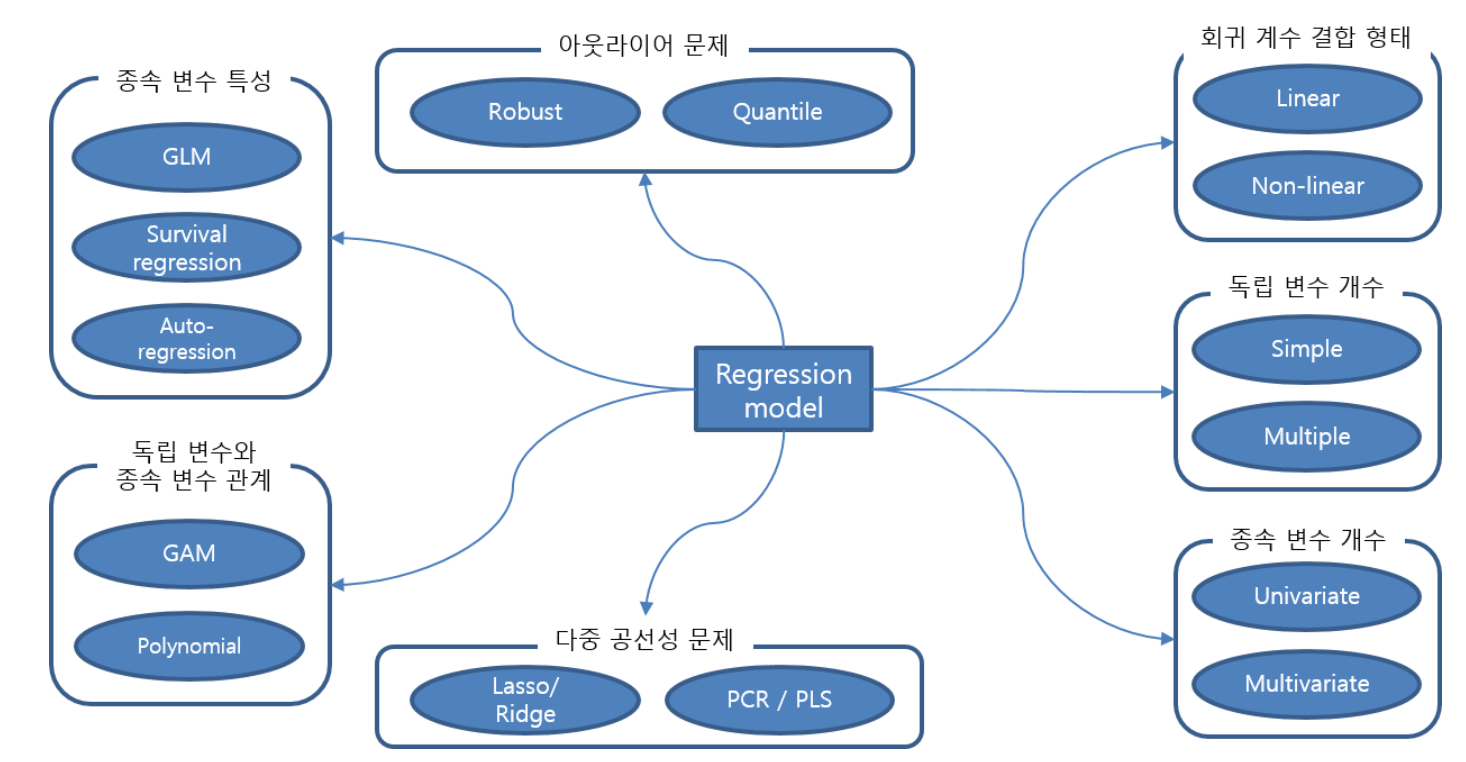

#Rubust Regression

 - Huber regression : Huber regression is an example of a robust regression algorithm that assigns less weight to observations identified as outliers.

 - RANSAC regression: Random sample consensus (RANSAC) regression is a non-deterministic algorithm that tries to separate the training data into inliers (which may be subject to noise) and outliers. Then, it estimates the final model only using the inliers.

 - Theil-Sen regression: The last of the robust regression algorithms available in scikit-learn is the Theil-Sen regression. It is a non-parametric regression method, which means that it makes no assumption about the underlying data distribution. In short, it involves fitting multiple regression models on subsets of the training data and then aggregating the coefficients at the last step.

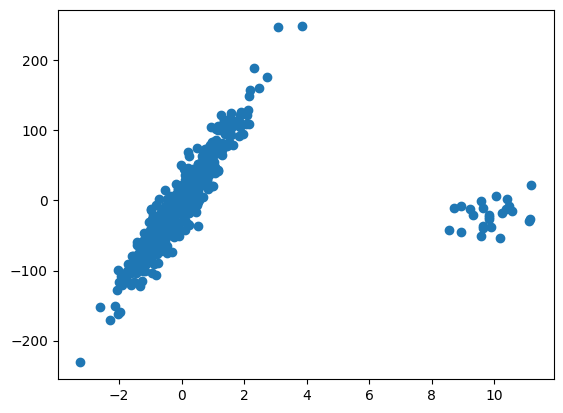

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	  RANSACRegressor, TheilSenRegressor)


N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES, 
    n_features=1, 
    n_informative=1, 
    noise=20, 
    coef=True, 
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers               
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);



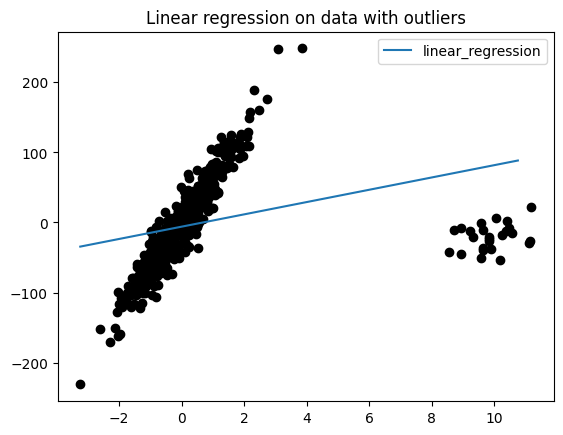

In [ ]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)


fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Linear regression on data with outliers");

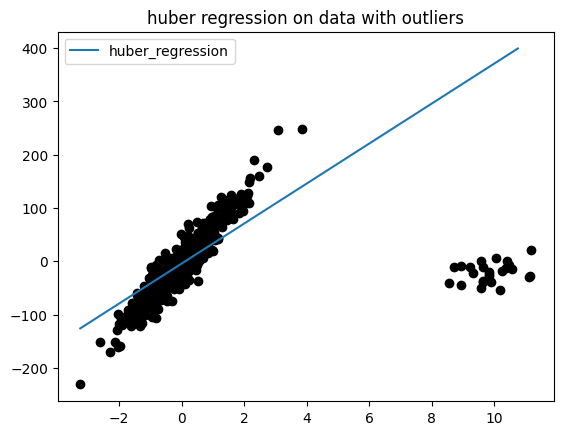

In [ ]:
#Huber

huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"huber_regression": huber.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("huber regression on data with outliers");

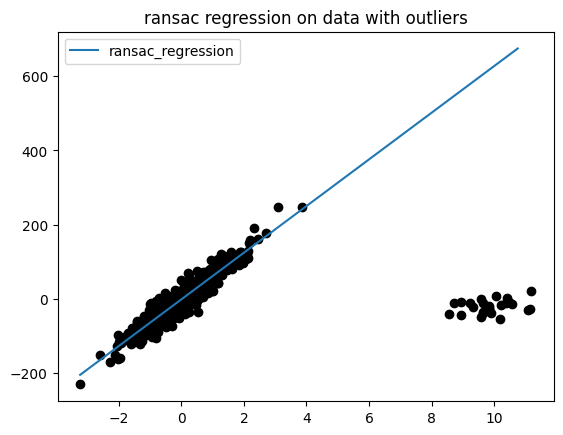

In [ ]:
#Ransac

ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])


fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"ransac_regression": ransac.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("ransac regression on data with outliers");

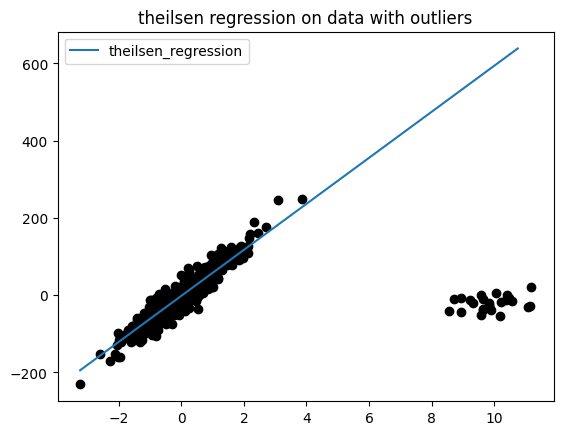

In [ ]:
#theilsen

theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])


fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"theilsen_regression": theilsen.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("theilsen regression on data with outliers");

#Quantile Regression

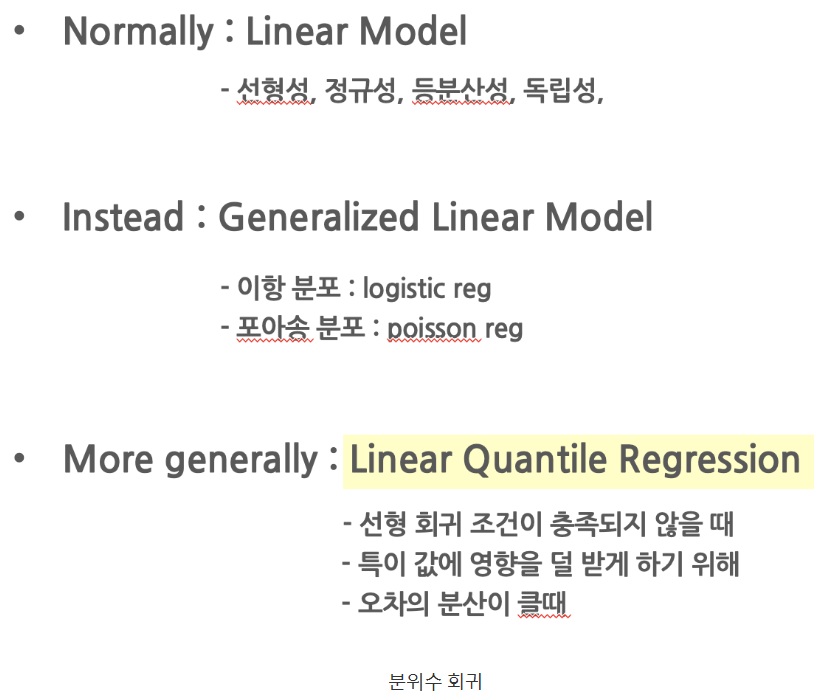

Text(0.5, 1.0, 'Data with constant variance')

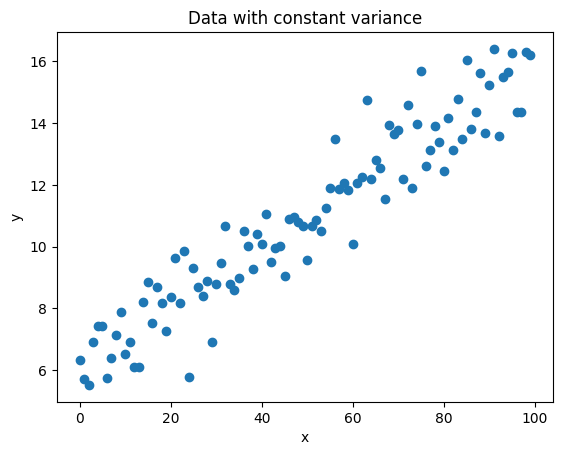

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt   
## Generate some data with constant variance /noise 
x = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 
## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)
## Regression equation 

y = intercept_ + slope_ * x + error_  
plt.figure(1) 
plt.scatter(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with constant variance")

Mean squared error: 0.88
Variance score: 0.90


Text(0.5, 1.0, 'Linear regression')

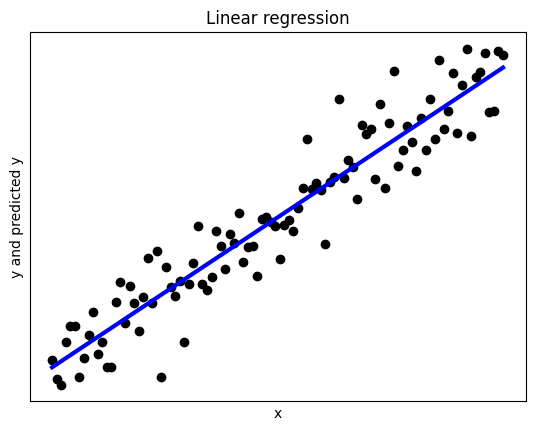

In [ ]:
## Let us do a least square regression on the above dataset 
from sklearn.linear_model import LinearRegression  

model1 = LinearRegression() 
model1.fit(x, y)  
y_pred1 = model1.predict(x)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred1 - y) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x, y))) 

## Plot the regression 

plt.figure(2) 
plt.scatter(x, y,  color='black') 
plt.plot(x, y_pred1, color='blue',          linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression")

Text(0.5, 1.0, 'Data with non-constant variance')

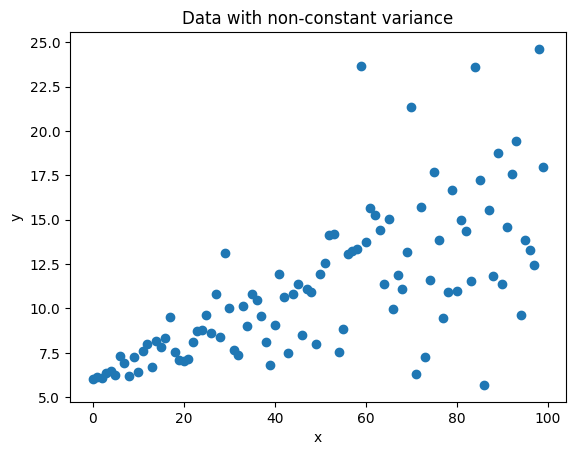

In [ ]:
## Generate some data with non-constant variance 

x_ = np.arange(100).reshape(100,1) 

intercept_ = 6 
slope_ = 0.1 

## Non constant variance 

var_ = 0.1 + 0.05 * x_ 

## non constant error 

error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_) 

## Regression equation 

y_ = intercept_ + slope_ * x + error_  

plt.figure(3) 
plt.scatter(x_, y_) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with non-constant variance")

Mean squared error: 9.10
Variance score: 0.47


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

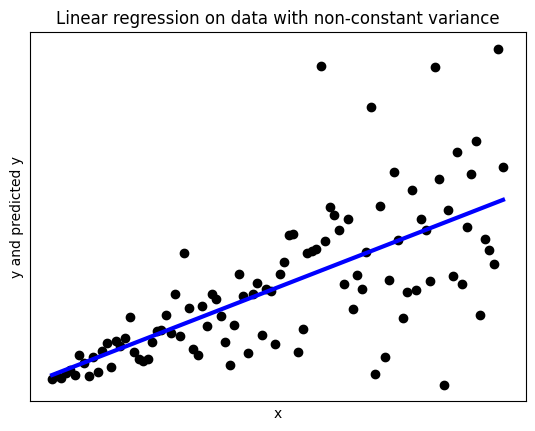

In [ ]:
## Try to fit a linear regression 
model2 = LinearRegression() 
model2.fit(x_, y_)  
y_pred2 = model2.predict(x_)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred2 - y_) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))  

## Plot the regression plt.figure(4) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue',          linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression on data with non-constant variance")

In [ ]:
## Quantile regression for the median, 0.5th quantile 

import pandas as pd  
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"]) 
import statsmodels.formula.api as smf   

mod = smf.quantreg('y ~ x', data) 
res = mod.fit(q=.5) 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3697
Model:                       QuantReg   Bandwidth:                       2.171
Method:                 Least Squares   Sparsity:                        5.751
Date:                Thu, 01 Jun 2023   No. Observations:                  100
Time:                        12:58:07   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0754      0.571     10.644      0.000       4.943       7.208
x              0.1031      0.010     10.352      0.000       0.083       0.123


In [ ]:
## Build the model for other quantiles 

quantiles = np.arange(0.1,1,0.1)
models = [] 
params = []  

for qt in quantiles:  
  res = mod.fit(q = qt )    
  models.append(res)    
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())   
  params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])  
  print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619


<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.pa

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619


<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())


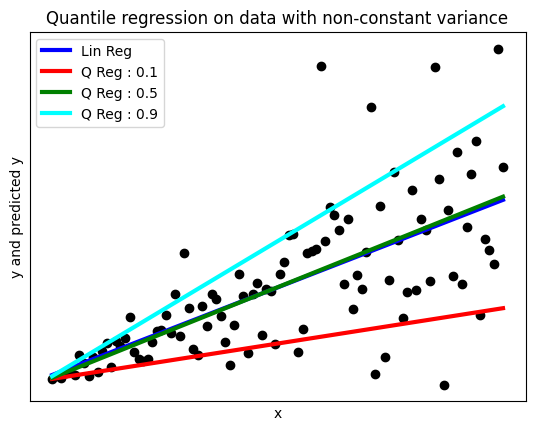

In [ ]:
plt.figure(5) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue',          linewidth=3, label='Lin Reg')  
y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_ 
plt.plot(x_, y_pred3, color='red',          linewidth=3, label='Q Reg : 0.1')  
y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_ 
plt.plot(x_, y_pred4, color='green',          linewidth=3, label='Q Reg : 0.5')   
y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_ 
plt.plot(x_, y_pred5, color='cyan',          linewidth=3, label='Q Reg : 0.9')   
plt.xticks(()) 
plt.yticks(())
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Quantile regression on data with non-constant variance") 
plt.legend()

#Survival Regression

:https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

The idea behind Cox’s proportional hazard model is that the log-hazard of an individual is a linear function of their covariates and a population-level baseline hazard that changes over time. Mathematically:

In [2]:
!pip install lifelines
from lifelines.datasets import load_rossi

rossi = load_rossi()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 10.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bad9280d3a7ba578ba84f1898b481dfd2b2ddc34dc5fe288795fc2aac897919c
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [3]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-06-02 02:40:07 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [5]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.39
         time fit was run = 2023-06-02 02:40:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.33       0.72       0.19            -0.70             0.04                 0.49                 1.05
wexp       -0.24       0.79       0.21            -0.65             0.17                 0.52                 1.19
age        -0.03       0.97       0.03            -0.09             0.03                 0.92                 1.03
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

            cmp to     z    p   -log2(p)
covariate                               
fin           0.00 -1.73 0.08       3.57
wexp          0.00 -1.14 0.26       1.97
age           0.00 -0.93 0.35       1.51
prio          0.00  1.80 0.07       3.80
age:prio      0.00 -1.28 0.20       2.32
---
Concordance = 0.64
Partial AIC = 1328.77
log-likelihood ratio test = 31.99 on 5 df
-log2(p) of ll-ratio test = 17.35

In [6]:
X = rossi

cph.predict_survival_function(X)
cph.predict_median(X)
cph.predict_partial_hazard(X)

0      1.157686
1      3.768718
2      4.919517
3      0.699116
4      1.447786
         ...   
427    0.520233
428    1.385036
429    0.784224
430    0.812407
431    0.672850
Length: 432, dtype: float64

In [7]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

cph = CoxPHFitter(penalizer=0.1, l1_ratio=1.0) # sparse solutions,
cph.fit(rossi, 'week', 'arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
                penalizer = 0.1
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -675.38
         time fit was run = 2023-06-02 02:41:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
age        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
race        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wexp       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
mar        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
paro       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
prio        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z    p   -log2(p)
covariate                               
fin           0.00 -0.00 1.00       0.00
age           0.00 -0.00 1.00       0.00
race          0.00  0.00 1.00       0.00
wexp          0.00 -0.00 1.00       0.00
mar           0.00 -0.00 1.00       0.00
paro          0.00 -0.00 1.00       0.00
prio          0.00  0.00 1.00       0.00
---
Concordance = 0.64
Partial AIC = 1364.76
log-likelihood ratio test = -0.00 on 7 df
-log2(p) of ll-ratio test = -0.00

#GAM: Generalized Additive Models

GAM은 이를 좀 더 확장하여 변수가 여러개 일 때 변수들간의 가법성(Additive)를 유지하면서 비선형을 부여할 때 활용할 수 있는 방법입니다. 따라서 GAM은 아래와 같이 표현될 수 있습니다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
<ipython-input-9-363c894aa5da>:14: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  3% (4 of 125) |                        | Elapsed Time: 0:00:00 ETA:   0:00:04

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.7894
Link Function:                     IdentityLink Log Likelihood:                                -24122.8975
Number of Samples:                         3000 AIC:                                            48275.3738
                                                AICc:                                           48275.5303
                                                GCV:                                             1248.7894
                                                Scale:                                           1238.4616
                                                Pseudo R-Squared:                                   0.2918
Feature Function                  Lam

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


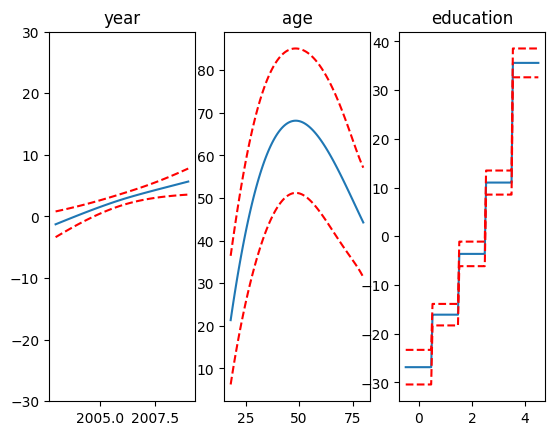

In [9]:
!pip install pygam
from pygam import LinearGAM, s,f
from pygam.datasets import wage
import matplotlib.pyplot as plt
import numpy as np

##Sample Data
X,y = wage(return_X_y = True)

## Fitting 

gam = LinearGAM(s(0) + s(1, n_splines = 5) + f(2))
gam.gridsearch(X, y)
gam.summary()
gam.lam

## Prediction
gam.predict(X)
gam.prediction_intervals(X, width=.95)

##Parameter Grid Search

lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam.gridsearch(X,y, lam=lams) ## 구불거리는 정도
gam.lam


## Partial Dependence Plot

fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):    
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

#Polynomial Regression



In [1]:
import matplotlib.pyplot as plt
import numpy as np
 
def make_data(size=100, noise=1):
    x = np.linspace(-5, 11, size).reshape(-1, 1)
    y = 3*x**2 + 3*x
 
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가
 
    plt.scatter(x, y)
    plt.suptitle("Sample Data", size=24)
    plt.show()
 
    return x, yy

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
 
def poly(x, degree=2):
    model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = model.fit_transform(x)
    return x, x_poly

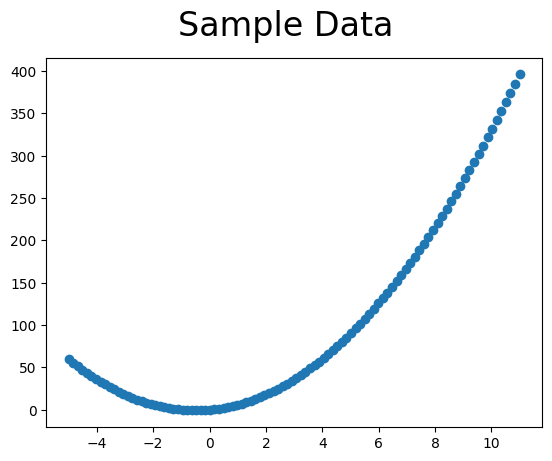

w1:  3.0036041194532968
w2:  3.0146791567191507
b:  -0.4725177039251349


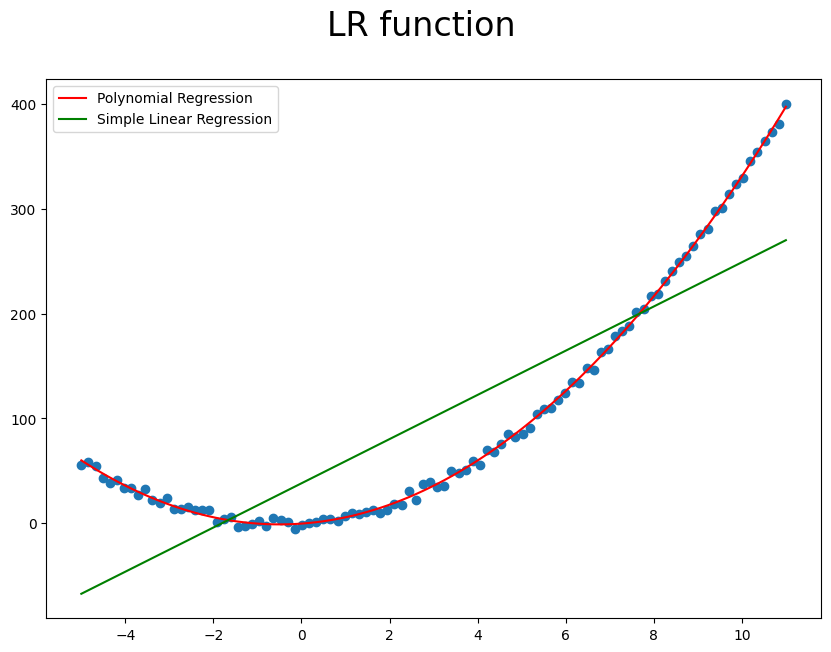

결정계수:  0.9991197673144658
상관계수: 
                 x         y   predict
x        1.000000  0.858505  0.858883
y        0.858505  1.000000  0.999560
predict  0.858883  0.999560  1.000000
MSE:  11.563236684206867


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
 
def LR(poly_x, x, y):
    SLR_model = LinearRegression()
    model = LinearRegression()
 
    SLR_model.fit(x, y)
    model.fit(poly_x, y)
 
    print("w1: ", model.coef_[0][0])
    print("w2: ", model.coef_[0][1])
    print("b: ",  model.intercept_[0])
 
    SLR_result = SLR_model.predict(x)
    result = model.predict(poly_x)
 
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y)
    plt.plot(x, result, color='red', label='Polynomial Regression')
    plt.plot(x, SLR_result, color='green', label='Simple Linear Regression')
    plt.suptitle("LR function", size=24)
    plt.legend()
    plt.show()
 
    return result
 
x, y = make_data(size=100, noise=6)
x, x_poly = poly(x)
result = LR(x_poly, x, y)
data = np.concatenate((x, y, result), axis=1)
df = pd.DataFrame(data, columns=['x', 'y', 'predict'])
 
print("결정계수: ", r2_score(y, result))
print("상관계수: \n", df.corr())
print("MSE: ", mean_squared_error(y, result))
 
# w1:  3.088145089337895
# w2:  2.991563564168224
# b:  0.6733335620988612
 
# 결정계수:  0.999178861266219
# 상관계수: 
#                  x         y   predict
# x        1.000000  0.859681  0.860034
# y        0.859681  1.000000  0.999589
# predict  0.860034  0.999589  1.000000
# MSE:  10.702276737672278

#GLM


1) 종속변수가 정규분포하지 않는 경우를 포함하는 선형모형의 확장

2) family라는 인자의 따라 link함수가 달라진다.

종속변수의 분포가 정규분포인 경우 Gaussian
종속변수의 분포가 이항분포 경우 binomial
종속변수의 분포가 포아송인 경우 Poisson
종속변수의 분포가 역정규분포인 경우 inverse gaussian
종속변수의 분포가 감마분포인 경우 gamma

3) 대표적모델
종속변수가 0 아니면 1인 경우 : Logistic regression
종속변수가 순위나 선호도와 같이 순서만 있는 데이터 : ordinal regression
종속변수가 개수를 나타내는 경우 : poisson Regression

In [8]:
import statsmodels.api as sm

data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Fri, 02 Jun 2023   Deviance:                     0.087389
Time:                        08:55:21   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


#PCR

먼저 PCR은 차원 축소 방법 중에 대표적인 방법인 PCA를 활용하는 방안입니다. 즉 input 변수 
의 주성분을 활용하여 분산을 최대화하도록 새로운 
를 선형결합을 통해 생성합니다. 그 다음 
를 활용하여 종속변수 
에 대하여 ols 추정을 합니다. (PCA에 대해서는

#PLS

PLS는 PCR과 마찬가지로 input 변수 
의 선형결합을 활용하여 새로운 변수 
를 만드는 것은 동일합니다. 다만 PCR이 
의 분산을 최대화하도록 
를 만들었다면, PLS는 
의 분산뿐만 아니라 동시에 종속변수 
와의 공분산도 최대화 하도록 새로운 변수 
를 만듭니다.

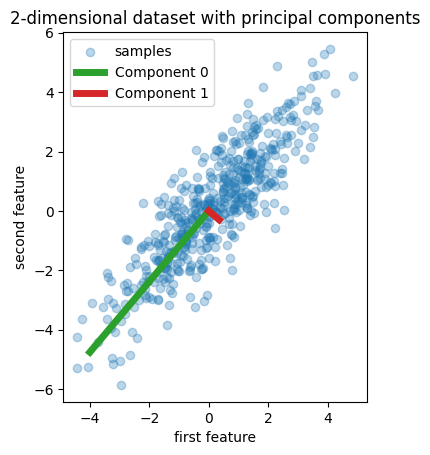

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

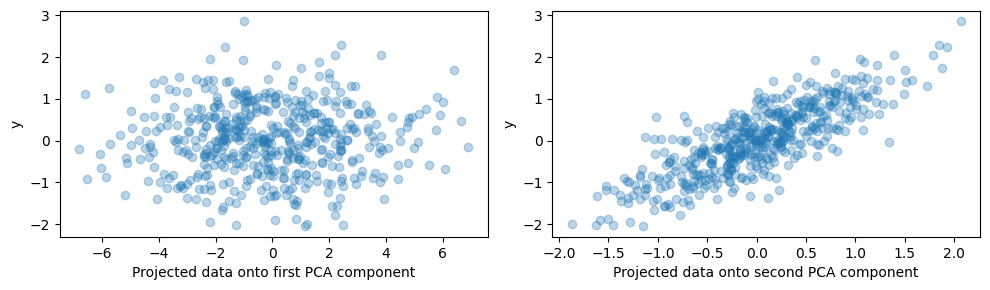

In [11]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

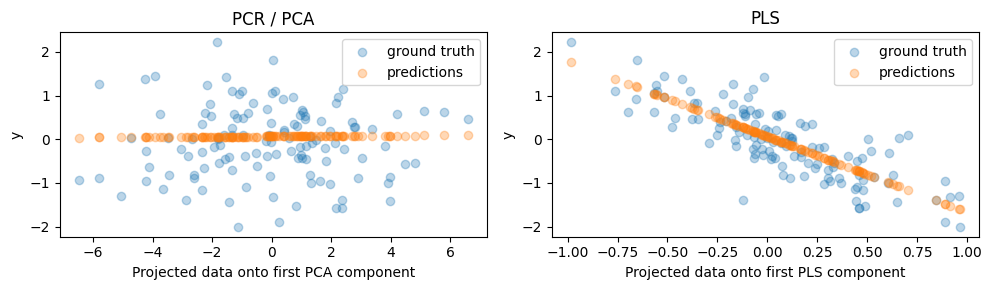

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [13]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.026
PLS r-squared 0.658
